Here, we will use the <a href="http://yann.lecun.com/exdb/mnist/">MNIST hand-written digit dataset</a> to train a classification model. This is a well-established, commonly used dataset consisting of training 60,000 images and 10,000 test images. 

We will build a perceptron, or neural network, to take images of a hand-written numbers and convert them to a digit.  This is an effective learning exercise because most people have experience trying to read sloppy handwriting; we will build on your intuition and experience to learn how the model works. 

We start again by loading required modules.  We will use Keras, a versatile user-friendly machine learning library (which is now part of TensorFlow).  

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout

/Users/bjthomps/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In this case the three elements of the machine learning model are
- Experience/Data/Input: A collection of 28x28 images of hand-written numbers between 0 and 9, with labels
- Task: train the model to take an image of a hand-written number and return a label between 0 and 9
- Performance/Cost function: We will start with a simple cost function, <i>mse</i>, which minimizes the mean squared error of images that are incorrectly labeled 

We load the MNIST dataset with the following code and print the shapes.

In [6]:
(x_train, l_train), (x_test, l_test) = mnist.load_data()
print('x_train shape: ',x_train.shape)
print('l_train shape: ',l_train.shape)
print('x_test shape: ',x_test.shape)
print('l_test shape: ',l_test.shape)

x_train shape:  (60000, 28, 28)
l_train shape:  (60000,)
x_test shape:  (10000, 28, 28)
l_test shape:  (10000,)


This image is a  3


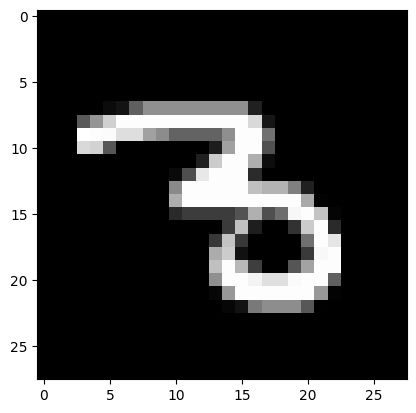

In [16]:
index=30
print('This image is a ',l_train[index])
plt.imshow(x_train[index],cmap='binary_r');

The `x` variables have shapes (28,28) which are the black-white pixels for the small images. There are 60,000 training and 10,000 test samples.

Now, we will be dealing with another fully-connected model (using Dense layers). We must now reshape the (28,28) into (28*28) or (784).

In [ ]:
x_train_new = x_train.reshape(x_train.shape[0],28*28)
x_test_new = x_test.reshape(x_test.shape[0],28*28)

Next, we will be doing something new. This is a different type of classification problem where we want to predict probability that an image is a 0, a 1, a 2, etc. So we are going to turn the outputs from integers (0-9) into a vector of length 10. If the number is 0, it becomes [1,0,0,0,0,0,0,0,0,0]. If the number is a 1, it becomes [0,1,0,0,0,0,0,0,0,0]. This continues up to 9. We can do this easily using TensorFlow's `to_categorical` function.

In [ ]:
l_train_new = tf.keras.utils.to_categorical(l_train, num_classes=10, dtype='float32')
l_test_new = tf.keras.utils.to_categorical(l_test, num_classes=10, dtype='float32')
print(l_train_new.shape)
print(l_test_new.shape)

To see this in the data itself, we will look at the first training sample. Print the original label, then the categorical label, then plot the image. Note: we use the `binary_r` colormap which is a grayscale colormap with the lowest values being dark and the highest values being light.

In [ ]:
print(l_train[0])
print(l_train_new[0])
plt.imshow(x_train_new[0].reshape(28,28),cmap='binary_r');

Now we are getting ready to develop our ML model. The last step in data preparation is to normalize our input data. Images have values that range from 0 to 255. Large numbers can cause issues with training since the weights are all initialized to be small. By dividing all values by 255, we get values between 0 and 1. Now, the weights will all be in the general ballpark of where they should be.

In [ ]:
x_train_new = x_train_new / 255.
x_test_new = x_test_new / 255.

We are defining our model as we did with the TensorFlow perceptron. This time, it is slightly more complicated. After the input layer, we have a layer with 256 neurons and a sigmoid activation function. Then we add dropout which helps prevent the model from overfitting to the training data. The rate is the percentage of neurons that are canceled every time the model is run (0.25 = 25%). The second layer has 64 neurons, sigmoid activation, and 10% dropout. The output layer has 10 neurons (for the 10 categories). The softmax activation function is used for classification outputs, because it normalizes the outputs to become probabilities. The sum of all softmax activations will be 1.0 for 100% probability of being one of the outputs.

In [ ]:
model = Sequential()
model.add(Input(shape=(x_train_new.shape[1],)))
model.add(Dense(units=256,activation='sigmoid'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=64,activation='sigmoid'))
model.add(Dropout(rate=0.10))
model.add(Dense(units=l_train_new.shape[1],activation='softmax'))
model.compile(loss='mse',optimizer='sgd')
model.summary()

We fit the model to the data for 10 epochs with a larger batch size of 128. We also provide validation data to see how the model does on independent data during training.

In [ ]:
model.fit(x_train_new,l_train_new,epochs=10,batch_size=128,validation_data=(x_test_new,l_test_new),shuffle=True,verbose=1)

With the trained model, we will predict for a random validation sample. Since the prediction will be 10 probabilities, we take the `argmax` or the location in the output with the highest probability to be its prediction. Notice that the model does not perform well. You can keep pressing play to see different predictions.

In [ ]:
index = np.random.randint(0,x_test_new.shape[0])
pred = model.predict(x_test_new[index:index+1])
pred_int = np.argmax(pred)
print('Truth:',l_test[index],'Prediction:',pred_int,'(confidence=%.2f%%)'%(100*pred[0,pred_int]))
plt.imshow(x_test_new[index].reshape(28,28),cmap='binary_r');

A big issue with the previous model is that it does not have an appropriate loss function and optimizer. We were using the same one from the previous simple problem. However, our data is now 784-dimensional and there are 60,000 training images. This type of classification works better with a binary crossentropy loss function. Also we use a more advanced optimizer called Adam.

In [ ]:
model = Sequential()
model.add(Input(shape=(x_train_new.shape[1],)))
model.add(Dense(units=256,activation='sigmoid'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=64,activation='relu'))
model.add(Dropout(rate=0.10))
model.add(Dense(units=l_train_new.shape[1],activation='softmax'))
model.compile(loss='binary_crossentropy',optimizer='Adam')
model.summary()

We fit the model the same way we did previously.

In [ ]:
model.fit(x_train_new,l_train_new,epochs=10,batch_size=128,validation_data=(x_test_new,l_test_new),shuffle=True,verbose=1)

We can run the random predictions again to see how much more accurate and confident the model is.

In [ ]:
index = np.random.randint(0,x_test_new.shape[0])
pred = model.predict(x_test_new[index:index+1])
pred_int = np.argmax(pred)
print('Truth:',l_test[index],'Prediction:',pred_int,'(confidence=%.2f%%)'%(100*pred[0,pred_int]))
plt.imshow(x_test_new[index].reshape(28,28),cmap='binary_r');


For fun, we will add a lot of noise to the image. The standard deviation is about 40%. You can see in the plots that many digits are tough for us to even tell but you may be surprised how well the model works here. Even so, it clearly does not perform as well as it did previously.

In [ ]:
index = np.random.randint(0,x_test_new.shape[0])
input_clean = x_test_new[index:index+1]
input_noisy = input_clean + np.random.normal(0,0.4,size=[input_clean.shape[1]])
pred = model.predict(input_noisy)
pred_int = np.argmax(pred)
print('Truth:',l_test[index],'Prediction:',pred_int,'(confidence=%.2f%%)'%(100*pred[0,pred_int]))
plt.imshow(input_noisy.reshape(28,28),cmap='binary_r',vmin=0,vmax=1);


## Exploration

- What are the hyperparameters in this exercise?  How do they affect performance? 
- Which are more correlated with speed, and which are more correlated with accuracy? 

Many of the numbers in this dataset are poorly written - even to the extent that two users may disagree on which number it is! 
- Would it be fair practice to remove the unclear characters from the set?  How would this improve performance?
- How could you use the model's performance to determine which characters are unclear? 
- The numbers are scaled with white text on a black background. However, most examples of written text are on a white background. Why is the dataset prepared in this manner? 
- How would you adapt this specific model (28x28 images trained on a black background) for use in the "real" world? 

The dense simply connected perceptron model treats the connection between each pixel exactly the same. In reality, the values of neighboring pixels have more influence than distant pixels. **Convolutional neural networks (CNNs)** use a series of spatial filters to determine the weights of each layer. 

<a href="https://www.aanda.org/articles/aa/pdf/2018/06/aa31344-17.pdf">*Baso & Ramos* (A&A, 615, A5, 2018)</a> use a CNN to enhance solar magnetic field images. A description of the method, and the code developed for this use, are available in the <a href="https://helioml.org/03/Enhancing_SDO_images.html">Helio-ML online textbook</a>.

Another common form of neural network that takes into account connections within neighboring data points is a Long-Short Term Memory (LSTM) network. LSTMs are commonly used on time series data, using past data to predict future behavior. 

<a href="https://www.frontiersin.org/articles/10.3389/fspas.2020.00054/full">Argall et al. (Front. Astron. Space Sci., Vol. 7, 2020)</a> use an LSTM to detect magnetopause crossings by the Magnetospheric Multscale (MMS) mission. The full code, description and analysis are also available in the <a href="https://helioml.org/08/notebook.html">Helio-ML online textbook</a>